In [2]:
import numpy as np
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt

In [11]:
class LMSTrainer(BaseEstimator):
    
    def __init__(self, delta, alpha, tolerancia, analitic=False):
        self.analitic = analitic
        self._trained = False
        self.analitic = analitic
        self._trained = False
        self._delta = delta # vetor de parametros
        self._alpha = alpha # taxa de convergencias
        self._tolerancia = tolerancia # erro maximo
        self._custoAnt = 0.0 # quarda o custo da iteracao anterior
        self._max = 5000 # quantidade maxima de iteracoes
        self._it = 0 # iteracao atual
            
    def fit(self, X, y=None):
        
        if self.analitic:
            
          # TODO: FAZER POR MATRIZES
          pass
        else:
            self.grad(X,y)
        self._trained = True
        
        return self
        
    def predict(self, X, y=None):
        
        if not self._trained:
           raise RuntimeError("You must train classifer before predicting data!")
        else:
            return self.h(X)
    
    def h(self, x):
        if type(x) is int:
            return self.funcAfim(x)
        else:
            return np.dot(x, self._delta)
    
    def custo(self, X, y, n):
        error = 0.0
        for i, x in enumerate(X):
            error += (self.h(x) - y[i])**2
        return error/(2.0*n)
        
    def convergiu(self, X, y, n):
        self._it += 1
        custoAtual = self.custo(X, y, n)
        flag1 = self._it >= self._max
        flag2 = np.abs(custoAtual - self._custoAnt) <= self._tolerancia
        self._custoAnt = custoAtual
        return flag1 or flag2
    
    def grad(self, X, y):
        m = len(y)
        while not self.convergiu(X, y, m):
            tmp = []
            qtd = len(self._delta)
            for i in range(qtd):
                tmp.append( self._delta[i] - self._alpha * self.sumDiff(X, y, m, i))
            self._delta = np.copy(tmp)
        if self._it >= self._max:
            print("número máximo de iterações alcançado.")
    
    def sumDiff(self, X, y, n, j):
        sum = 0.0
        for i, x in enumerate(X):
            sum += ((self.h(x) - y[i]) * x[j])
        return sum/n
    
    def funcAfim(self, x):
        return self._delta[0] + self._delta[1] * x
    
    def getDelta(self):
        return self._delta

In [4]:
class DrawingGraph:
    
    @staticmethod
    def drawPoint(x, y):
        plt.scatter(x, y, s=10, c='r' )
    
    @staticmethod
    def draw(x, f, title): # valores x e função f
        plt.plot(x, [f(a) for a in x])
        plt.title(title)
        plt.show()

    @staticmethod
    def drawPoint2(x, y):
        plt.scatter(x, y, s=10, c='b' )
        plt.show()

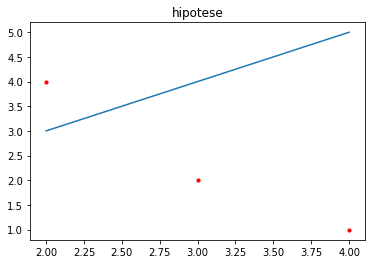

deltas:  [1, 1]


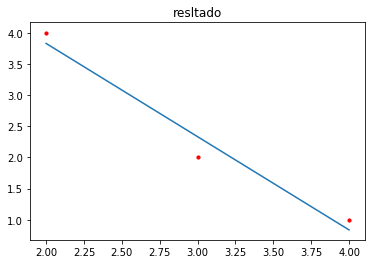

deltas:  [ 6.81826915 -1.4952943 ]
-0.6582023648266926


In [13]:

x_train = np.array([[1,2],[1,3],[1,4]])
y_train = np.array([4,2,1])

teste = np.array([x[1] for x in x_train])
trainer = LMSTrainer([1,1], 0.1, 0.0000001)

DrawingGraph.drawPoint(teste, y_train)
DrawingGraph.draw(teste, trainer.funcAfim, "hipotese")
print("deltas: ", trainer.getDelta())

pred = trainer.fit(x_train, y_train)

DrawingGraph.drawPoint(teste, y_train)
DrawingGraph.draw(teste, trainer.funcAfim, "resltado")
print("deltas: ", trainer.getDelta())

print(pred.predict(5))